
data from "Construction and Modeling of a Coculture Microplate for Real-Time Measurement of Microbial Interactions"



In [2]:
# strain annotation 

A0 = [1,11,21,31,41,51,13,33,53,7,17,37,47,57,38,48,58];
LP = [12,32,52,5,15,25,35,45,55,27,8,9,19,29,10,20,30];
LB = [4,14,24,34,44,54,16,36,56,18,28,39,49,59,40,50,60];

# load data
data = CSV.read("../data_examples/DATA_Gut_Microbiome_CoC.csv", DataFrame);



Row,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,00:00:00,0.159,0.157,0.154,0.154,0.157,0.154,0.16,0.155,0.158,0.157,0.198,0.149,0.161,0.15,0.15,0.161,0.168,0.153,0.154,0.161,0.153,0.201,0.156,0.156,0.153,0.154,0.159,0.151,0.154,0.159,0.157,0.248,0.163,0.168,0.154,0.16,0.155,0.151,0.154,0.165,0.164,0.171,0.165,0.225,0.156,0.223,0.157,0.151,0.152,0.171,0.165,0.155,0.2,0.154,0.157,0.15,0.172,0.151,0.159,0.15
2,00:15:00,0.159,0.156,0.154,0.154,0.157,0.154,0.161,0.155,0.158,0.156,0.197,0.149,0.161,0.151,0.15,0.163,0.167,0.152,0.154,0.16,0.154,0.201,0.156,0.156,0.153,0.153,0.159,0.151,0.154,0.158,0.157,0.201,0.163,0.168,0.153,0.159,0.155,0.15,0.152,0.166,0.164,0.17,0.164,0.224,0.155,0.168,0.156,0.151,0.152,0.17,0.165,0.155,0.199,0.154,0.157,0.15,0.161,0.151,0.159,0.15
3,00:30:00,0.159,0.156,0.154,0.154,0.157,0.155,0.161,0.155,0.157,0.156,0.197,0.149,0.161,0.151,0.15,0.163,0.167,0.152,0.153,0.16,0.153,0.201,0.156,0.156,0.153,0.153,0.159,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.153,0.159,0.155,0.15,0.152,0.166,0.164,0.17,0.163,0.224,0.155,0.168,0.156,0.151,0.151,0.17,0.165,0.155,0.2,0.154,0.156,0.15,0.161,0.151,0.159,0.15
4,00:45:00,0.159,0.156,0.154,0.154,0.157,0.155,0.161,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.163,0.166,0.152,0.153,0.16,0.153,0.201,0.156,0.155,0.153,0.153,0.158,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.153,0.159,0.155,0.15,0.152,0.166,0.164,0.17,0.163,0.224,0.155,0.168,0.156,0.151,0.151,0.17,0.164,0.155,0.202,0.154,0.156,0.15,0.161,0.151,0.159,0.15
5,01:00:00,0.159,0.156,0.153,0.154,0.157,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.163,0.166,0.152,0.153,0.16,0.153,0.202,0.156,0.155,0.153,0.153,0.157,0.15,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.158,0.155,0.15,0.152,0.165,0.163,0.169,0.162,0.224,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.155,0.202,0.154,0.156,0.149,0.162,0.151,0.159,0.15
6,01:15:00,0.159,0.156,0.153,0.154,0.157,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.165,0.152,0.153,0.161,0.153,0.202,0.156,0.155,0.153,0.153,0.157,0.15,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.158,0.155,0.15,0.152,0.166,0.163,0.169,0.162,0.225,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.156,0.203,0.154,0.156,0.15,0.162,0.151,0.159,0.15
7,01:30:00,0.159,0.156,0.153,0.154,0.156,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.165,0.152,0.153,0.161,0.153,0.202,0.156,0.154,0.153,0.153,0.157,0.15,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.159,0.154,0.149,0.152,0.166,0.163,0.169,0.162,0.225,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.155,0.204,0.154,0.155,0.15,0.162,0.151,0.159,0.15
8,01:45:00,0.159,0.156,0.153,0.154,0.156,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.164,0.152,0.153,0.161,0.153,0.202,0.157,0.154,0.153,0.153,0.157,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.159,0.155,0.15,0.152,0.166,0.164,0.169,0.162,0.225,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.156,0.204,0.154,0.155,0.15,0.162,0.151,0.159,0.15
9,02:00:00,0.159,0.156,0.153,0.154,0.157,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.162,0.152,0.153,0.161,0.153,0.202,0.157,0.154,0.153,0.153,0.157,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.159,0.154,0.15,0.152,0.166,0.164,0.169,0.162,0.225,0.154,0.168,0.156,0.15,0.151,0.17,0.164,0.156,0.205,0.154,0.155,0.15,0.162,0.151,0.159,0.15


convert Time column from in elapsed time frome the start in hours, the delta time in the data is 15 minutes

In [3]:

delta_time = 15/60;
time_seq = 0:delta_time:(size(data,1)-1)*delta_time;
time_seq = [ time_seq[i] for i in 1: length(time_seq)];
data[!,:Time] = time_seq ;

evaluating blank values by doing the mean of the blank columns


In [4]:

index_tot = 2:1:size(data,2);
A0_index = A0.+1;
LP_index = LP.+1;
LB_index = LB.+1;
blanS1_index = setdiff(index_tot, [A0_index; LP_index; LB_index]);



data_blanS1_values = Matrix(data[:,blanS1_index]);
#blanS1_value = mean.(reduce(vcat,eachrow(data_blanS1_values)))
blanS1_value =  mean(data_blanS1_values,dims = (2));



Intializing the model for fitting with Kinbiont



In [5]:

model ="aHPM";
results_matrix = Kinbiont.initialize_df_results(model);

p_guess = [0.2, 0.001, 1.00, 1.0];
ub_ahpm = [3.0, 1.0,3.00, 5.0];
lb_ahpm = [0.001, 0.0,0.2, 0.0];



4-element Vector{Float64}:
 0.001
 0.0
 0.2
 0.0



Fitting all AO data in all conditions 

# AO, -


In [6]:

# [1,21,41];
A0 = [1,21,41].+1;

data_A0 = data[:,A0]; #.- blanS1_value

# mean of the replicates
data_A0_mean = mean(Matrix(data_A0),dims=2);

# Formatting data for Kinbiont
data_to_fit = permutedims( [time_seq data_A0_mean]);

# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit, 
    "AO_NA",
    "CoC_DT",
    model,
    p_guess;
    lb = lb_ahpm,
    ub = ub_ahpm,
);
Plots.scatter(data_to_fit[1,:],data_to_fit[2,:], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing],color=:black,markersize =2 ,size = (300,300))
Plots.plot!(results_ODE_fit[4],results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]",label=["fit " nothing],color=:red,markersize =4 ,size = (300,300))
results_matrix = [results_matrix results_ODE_fit[2]]


10×2 Matrix{Any}:
 "label_exp"       "CoC_DT"
 "well"            "AO_NA"
 "model"           "aHPM"
 "gr"             0.920199
 "exit_lag_rate"  0.0127327
 "N_max"          0.795335
 "shape"          0.0947905
 "th_max_gr"      0.0491105
 "emp_max_gr"     0.0736753
 "loss"           0.000431013



# AO, LP



In [7]:


# [11,31,51,7]; AO


A0 = [11, 31, 51, 7] .+ 1;

data_A0 = data[:, A0] ;#.- blanS1_value

# mean of the replicates
data_A0_mean = mean(Matrix(data_A0), dims=2);

# Formatting data for Kinbiont
data_to_fit = permutedims([time_seq data_A0_mean]);

# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit,
    "AO_LP",
    "CoC_DT",
    model,
    p_guess;
    lb=lb_ahpm,
    ub=ub_ahpm,
);

Plots.scatter(data_to_fit[1, :], data_to_fit[2, :], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing], color=:black, markersize=2, size=(300, 300))
Plots.plot!(results_ODE_fit[4], results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["fit " nothing], color=:red, markersize=4, size=(300, 300))
results_matrix = [results_matrix results_ODE_fit[2]]





10×3 Matrix{Any}:
 "label_exp"       "CoC_DT"     "CoC_DT"
 "well"            "AO_NA"      "AO_LP"
 "model"           "aHPM"       "aHPM"
 "gr"             0.920199     0.427283
 "exit_lag_rate"  0.0127327    0.00195977
 "N_max"          0.795335     1.79882
 "shape"          0.0947905    0.341434
 "th_max_gr"      0.0491105    0.10293
 "emp_max_gr"     0.0736753    0.136531
 "loss"           0.000431013  0.000762458



# AO, LB


In [8]:


# [13,33,53,17]; 


A0 = [13, 33, 53, 17] .+ 1;

data_A0 = data[:, A0] ;#.- blanS1_value

# mean of the replicates
data_A0_mean = mean(Matrix(data_A0), dims=2);

# Formatting data for Kinbiont
data_to_fit = permutedims([time_seq data_A0_mean]);

# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit,
    "AO_LB",
    "CoC_DT",
    model,
    p_guess;
    lb=lb_ahpm,
    ub=ub_ahpm,
);
Plots.scatter(data_to_fit[1, :], data_to_fit[2, :], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing], color=:black, markersize=2, size=(300, 300))
Plots.plot!(results_ODE_fit[4], results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["fit " nothing], color=:red, markersize=4, size=(300, 300))
results_matrix = [results_matrix results_ODE_fit[2]]



10×4 Matrix{Any}:
 "label_exp"       "CoC_DT"     "CoC_DT"     "CoC_DT"
 "well"            "AO_NA"      "AO_LP"      "AO_LB"
 "model"           "aHPM"       "aHPM"       "aHPM"
 "gr"             0.920199     0.427283     0.310151
 "exit_lag_rate"  0.0127327    0.00195977   0.00459586
 "N_max"          0.795335     1.79882      1.72631
 "shape"          0.0947905    0.341434     0.357179
 "th_max_gr"      0.0491105    0.10293      0.0779782
 "emp_max_gr"     0.0736753    0.136531     0.120278
 "loss"           0.000431013  0.000762458  0.000810248


# AO, AO



In [9]:



# [37,47,57];



A0 = [37, 47, 57] .+ 1;

data_A0 = data[:, A0] ;#.- blanS1_value

# mean of the replicates
data_A0_mean = mean(Matrix(data_A0), dims=2);

# Formatting data for Kinbiont
data_to_fit = permutedims([time_seq data_A0_mean]);

# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit,
    "AO_AO",
    "CoC_DT",
    model,
    p_guess;
    lb=lb_ahpm,
    ub=ub_ahpm,
);
Plots.scatter(data_to_fit[1, :], data_to_fit[2, :], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing], color=:black, markersize=2, size=(300, 300))
Plots.plot!(results_ODE_fit[4], results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["fit " nothing], color=:red, markersize=4, size=(300, 300))
results_matrix = [results_matrix results_ODE_fit[2]]




10×5 Matrix{Any}:
 "label_exp"       "CoC_DT"     "CoC_DT"     "CoC_DT"     "CoC_DT"
 "well"            "AO_NA"      "AO_LP"      "AO_LB"      "AO_AO"
 "model"           "aHPM"       "aHPM"       "aHPM"       "aHPM"
 "gr"             0.920199     0.427283     0.310151     0.613048
 "exit_lag_rate"  0.0127327    0.00195977   0.00459586   0.0438213
 "N_max"          0.795335     1.79882      1.72631      0.760434
 "shape"          0.0947905    0.341434     0.357179     0.0705303
 "th_max_gr"      0.0491105    0.10293      0.0779782    0.0336835
 "emp_max_gr"     0.0736753    0.136531     0.120278     0.0633558
 "loss"           0.000431013  0.000762458  0.000810248  0.000934927



Creating feature Matrix


In [10]:


label_row = ["AO_NA", "AO_LP", "AO_LB", "AO_AO"];
starting_0 = zeros(Int, 4, 3);
feature_matrix = hcat(label_row, starting_0);
feature_matrix[2, 2] = 1;
feature_matrix[3, 3] = 1;
feature_matrix[4, 4] = 1;
feature_names = ["LP", "LB", "AO"];
feature_matrix



4×4 Matrix{Any}:
 "AO_NA"  0  0  0
 "AO_LP"  1  0  0
 "AO_LB"  0  1  0
 "AO_AO"  0  0  1



Decision tree  of Nmax against the feature matrix


Feature 1 < 0.5 ?
├─ Feature 2 < 0.5 ?
    ├─ 0.7778846389950553 : 0/2
    └─ 1.7263088268415643 : 1/1
└─ 1.798822664580793 : 1/1


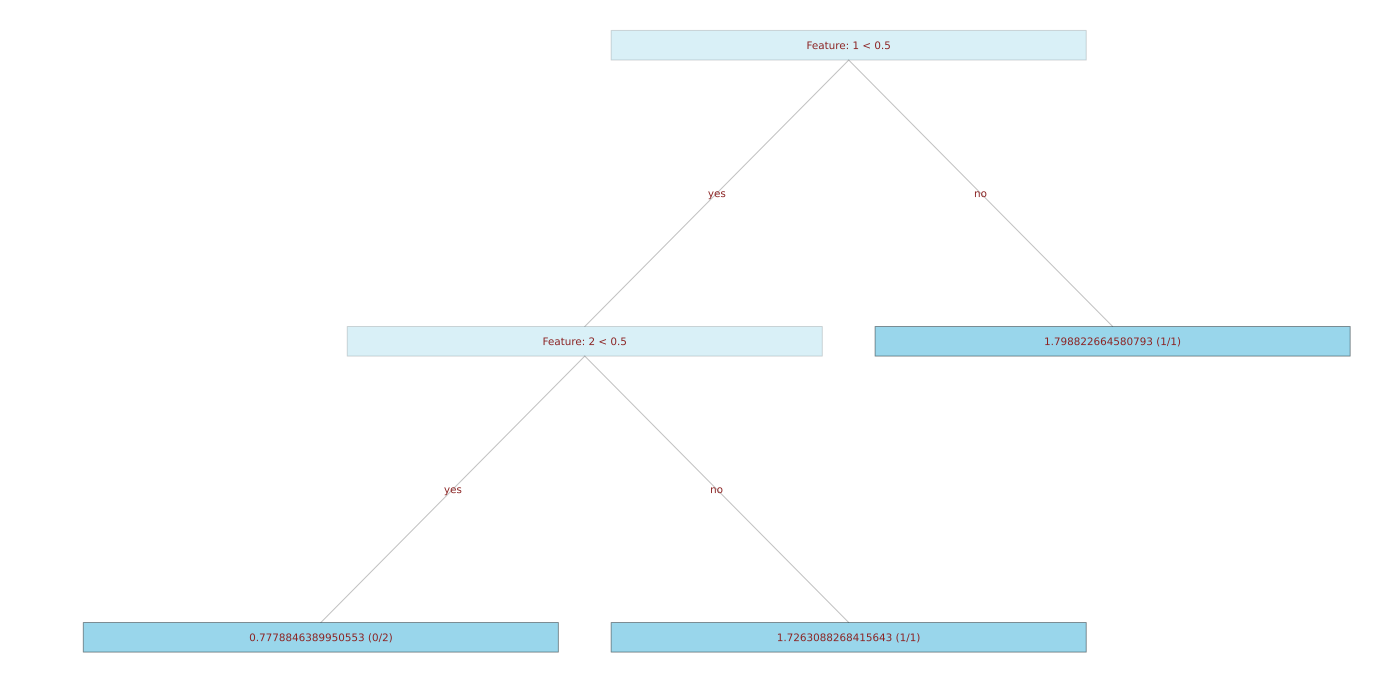

In [11]:

# Parameters of the decision tree
depth = -1;  # No depth limit

# Set random seed for reproducibility
seed = Random.seed!(1234);


# Decision tree regression ON Nmax
dt = Kinbiont.downstream_decision_tree_regression(results_matrix,
    feature_matrix,
    6;  # Row to learn
    do_pruning=false,
    verbose=true,
    do_cross_validation=false,
    max_depth=depth,
    seed=seed,
    min_samples_leaf=1,
    min_purity_increase=0.001,
    min_samples_split=2
);

# Visualizing the decision tree

wt = DecisionTree.wrap(dt[1]);
p2 = Plots.plot(wt, 0.9, 0.2; size=(1400, 700), connect_labels=["yes", "no"])




Decision tree regression exponential max growht rate


Feature 1 < 0.5 ?
├─ Feature 2 < 0.5 ?
    ├─ 0.04139698481220022 : 0/2
    └─ 0.07797816484800346 : 1/1
└─ 0.10292970903139684 : 1/1


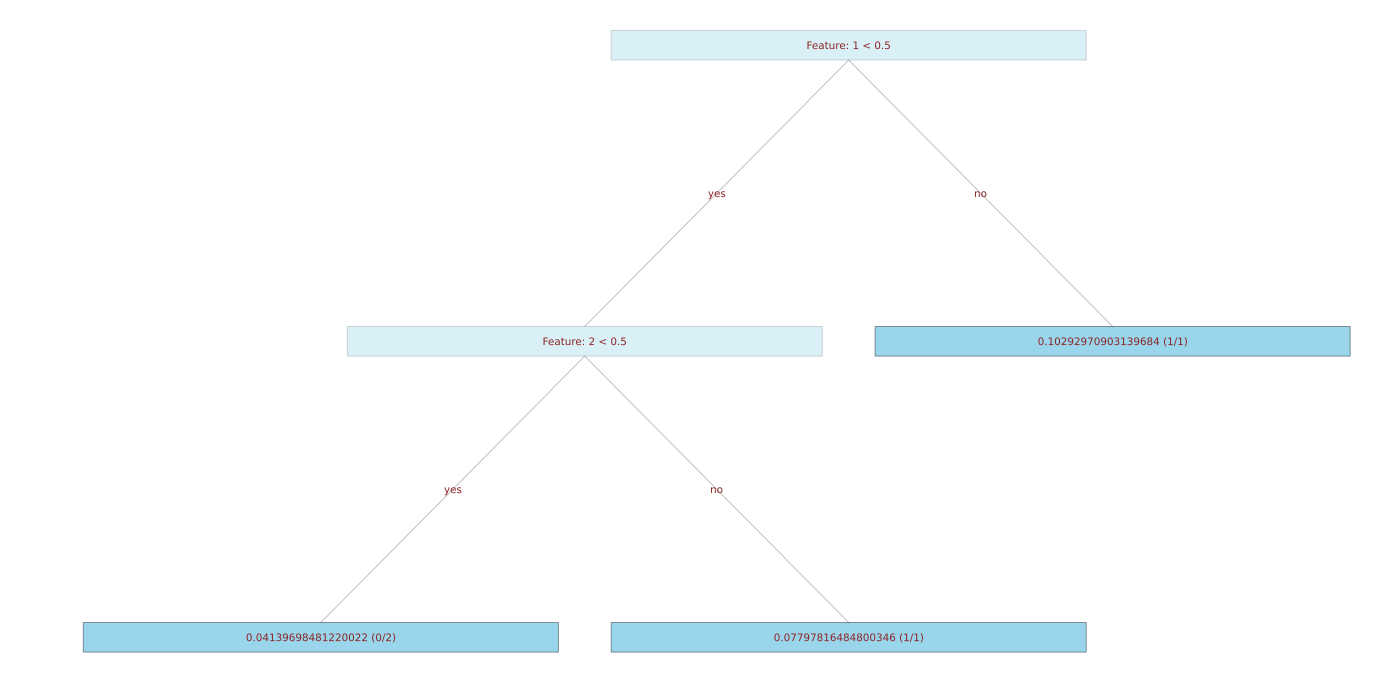

In [12]:

dt = Kinbiont.downstream_decision_tree_regression(results_matrix,
    feature_matrix,
    8;  # Row to learn
    do_pruning=false,
    verbose=true,
    do_cross_validation=false,
    max_depth=depth,
    seed=seed,
    min_samples_leaf=1,
    min_purity_increase=0.0001,
    min_samples_split=2
);

# Visualizing the decision tree

wt = DecisionTree.wrap(dt[1]);
p2 = Plots.plot(wt, 0.9, 0.2; size=(1400, 700), connect_labels=["yes", "no"])